# Modelos Multimodales con Estructura de Vision Transformer

Un **modelo multimodal** procesa y combina múltiples tipos de datos, como imágenes, texto, y audio, para generar salidas integradas, replicando cómo los humanos interpretan diversas fuentes de información. Los primeros enfoques usaban redes neuronales separadas para cada modalidad, como **CNNs** para imágenes y **RNNs** para texto, combinando sus salidas de forma superficial. El avance llegó con el uso de la **atención** en Transformers, como en **CLIP** y **DALL·E**, que unificaron texto e imágenes en un mismo espacio vectorial.

### Arquitecturas Multimodales (General con o sin estructura ViT):

1. **Fusión Tardía**: Procesa modalidades por separado y luego combina las representaciones al final.
2. **Atención Cruzada**: Modelos como **CLIP** usan atención entre texto e imagen desde el inicio, permitiendo un aprendizaje más profundo.
3. **Vision Transformer (ViT)**: ViT divide imágenes en parches y aplica atención. Se usa en modelos como **DALL·E** para integrar texto e imagen.
4. **Difusión**: **Stable Diffusion** genera imágenes a partir de ruido, guiado por embeddings de texto.
5. **Modelos Complejos**: **ImageBind** y **Perceiver IO** integran texto, imagen, audio y sensores, procesando simultáneamente varias modalidades.


# Modelos Multimodales con Estructura de Vision Transformer


1. **[CLIP (Contrastive Language-Image Pretraining)](https://huggingface.co/docs/transformers/model_doc/clip)**
   - **Uso de ViT**: CLIP utiliza ViT-B/32 o ViT-L/14 para procesar imágenes. Proyecta imágenes y texto en un espacio latente común para medir la similitud entre ellos.
   - **Aplicación**: Búsqueda de imágenes basada en texto y viceversa, así como tareas de comprensión visual y lingüística conjunta.

2. **[DALL·E](https://cdn.openai.com/papers/dall-e-3.pdf)**
   - **Uso de ViT**: ViT se emplea para representar imágenes que luego son utilizadas en el proceso de generación de nuevas imágenes a partir de descripciones textuales.
   - **Aplicación**: Generación de imágenes a partir de texto, con alta calidad y coherencia visual.

3. **[FLAVA (Foundational Language and Vision AI)](https://flava-model.github.io/)**
   - **Uso de ViT**: Utiliza ViT como parte de su arquitectura para procesar imágenes junto con texto en una red unificada.
   - **Aplicación**: Tareas conjuntas de visión y lenguaje, como razonamiento visual y reconocimiento de relaciones entre texto e imágenes.

4. **[ImageBind](https://github.com/facebookresearch/ImageBind/blob/main/model_card.md)**
   - **Uso de ViT**: Emplea ViT para procesar imágenes dentro de su arquitectura multimodal, combinando texto, imagen, audio y otros tipos de datos.
   - **Aplicación**: Integración de múltiples modalidades en un espacio compartido para tareas complejas como la fusión de información de diferentes fuentes.





2024-10-11 20:33:49.096754: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-11 20:33:49.111967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 20:33:49.127454: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 20:33:49.132728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-11 20:33:49.146403: I tensorflow/core/platform/cpu_feature_guar

Un Gato: 0.0001
Dos Gatos: 0.0000
Perro: 0.0001
Un mapache natural: 0.2479
Un mapache azul: 0.0944
Mapache roba objeto brillante: 0.0134
Mapache sube árbol alto: 0.0076
Mapache lava comida cuidadosamente: 0.0019
Mapache se esconde en la basura: 0.0120
Mapache se cuela en el ático: 0.1602
Mapache abre la tapa del frasco: 0.1015
Mapache busca comida de noche: 0.0116
Mapache juega con hojas: 0.0030
Mapache olfatea en busca de peligro: 0.0178
Mapache se acurruca para dormir: 0.0001
Mapache levanta las patas: 0.3285
La etiqueta predicha es: Mapache levanta las patas


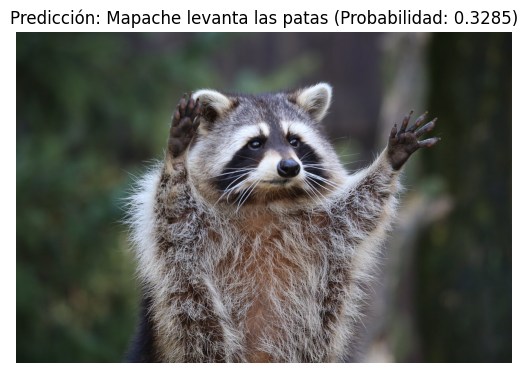

In [1]:
import matplotlib.pyplot as plt

from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

#https://huggingface.co/openai/clip-vit-large-patch14

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
path  = "/app/ProjectsDocker/Trabajos_Practicos/TP1/raccoon.jpg"
image = Image.open(path)

inputs = processor(text=["a photo of one cat", 
                         "a photo of two cats", 
                         "a photo of a dog", 
                         "a photo of natural raccoon", 
                         "a photo of blue raccoon", 
                         "Raccoon steals shiny object",
                         "Raccoon climbs tall tree", 
                         "Raccoon washes food carefully", 
                         "Raccoon hides in trash", 
                         "Raccoon sneaks into attic", 
                         "Raccoon opens jar lid", 
                         "Raccoon scavenges at night", 
                         "Raccoon plays with leaves", 
                         "Raccoon sniffs for danger", 
                         "Raccoon curls up sleeping", 
                         "Raccoon lifts paws"
                         ], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # image-text similarity score
probs = logits_per_image.softmax(dim=1) # softmax to get the label probabilities


# Imprimimos las probabilidades
labels = ["Un Gato",
          "Dos Gatos", 
          "Perro", 
          "Un mapache natural", 
          "Un mapache azul",
          "Mapache roba objeto brillante",
         "Mapache sube árbol alto", 
         "Mapache lava comida cuidadosamente", 
         "Mapache se esconde en la basura", 
         "Mapache se cuela en el ático", 
         "Mapache abre la tapa del frasco", 
         "Mapache busca comida de noche", 
         "Mapache juega con hojas", 
         "Mapache olfatea en busca de peligro", 
         "Mapache se acurruca para dormir", 
         "Mapache levanta las patas"
          ]
for label, prob in zip(labels, probs[0]):
    print(f"{label}: {prob:.4f}")

# Se obtiene la etiqueta predicha
predicted_index = probs.argmax().item()
predicted_label = labels[predicted_index]

print(f"La etiqueta predicha es: {predicted_label}")


plt.imshow(image)
plt.title(f"Predicción: {predicted_label} (Probabilidad: {probs[0][predicted_index]:.4f})")
plt.axis('off')
plt.show()


# Tarea: Evaluación de Modelos Multimodales con Vision Transformer

1. **Objetivo**:  
   Investigar y seleccionar diferentes modelos preentrenados que utilicen Vision Transformers (ViTs). Ejecutar estos modelos sobre la misma imagen o texto y comparar su desempeño para determinar cuál proporciona mejores resultados.

2. **Pasos a seguir**:
   - **Selección de Modelos**: Identificar y seleccionar varios modelos preentrenados basados en ViTs que sean adecuados para la tarea.
   - **Conjunto de Datos**: Elegir un conjunto de datos que contenga imágenes o textos pertinentes para la evaluación.
   - **Implementación**: Realizar la implementación de cada modelo, asegurando que todos se ejecuten sobre las mismas entradas (imagen o texto).
   - **Evaluación**: Comparar el desempeño de los modelos utilizando métricas relevantes, como precisión, recall y F1-score.
   - **Análisis de Resultados**: Documentar y analizar los resultados obtenidos para identificar el modelo más efectivo.

3. **Conclusiones**:  
   Al finalizar el proceso, sintetizar las conclusiones sobre el desempeño de los modelos evaluados y las implicaciones de los resultados en el contexto de aplicaciones multimodales.


   Ayuda: Dentro de este [Catalogo](https://huggingface.co/models?sort=trending), puede seleccionar la opción de modelos multimodales y ordenar por "mas descargado"